In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob 
import pandas as pds
INPUT_F=98304
OUTPUT_F=[INPUT_F/4,INPUT_F/(4*6),INPUT_F/(4*6*16),INPUT_F/(4*6*16*16)]

In [17]:
OUTPUT_F

[24576.0, 4096.0, 256.0, 16.0]

In [34]:
def compute_psd(signal,freq,fft_len=512,remove_mean=False):
    if remove_mean:
        signal=signal-np.mean(signal)
    fft_count=int(len(signal)/fft_len)
    PSD=np.zeros(fft_len)
    Delta_F=freq/fft_len
    for i in range(fft_count):
        fft=abs(np.fft.fft(signal[i*fft_len:((i+1)*fft_len)]))
        fft=fft/fft_len
        PSD+=fft**2
    PSD=PSD/fft_count
    PSD=PSD/Delta_F
    Freq=np.fft.fftfreq(fft_len,1./freq)
    return {"freq":Freq[0:int(fft_len/2)],"PSD":PSD[0:int(fft_len/2)]}




# Raw Time domain results

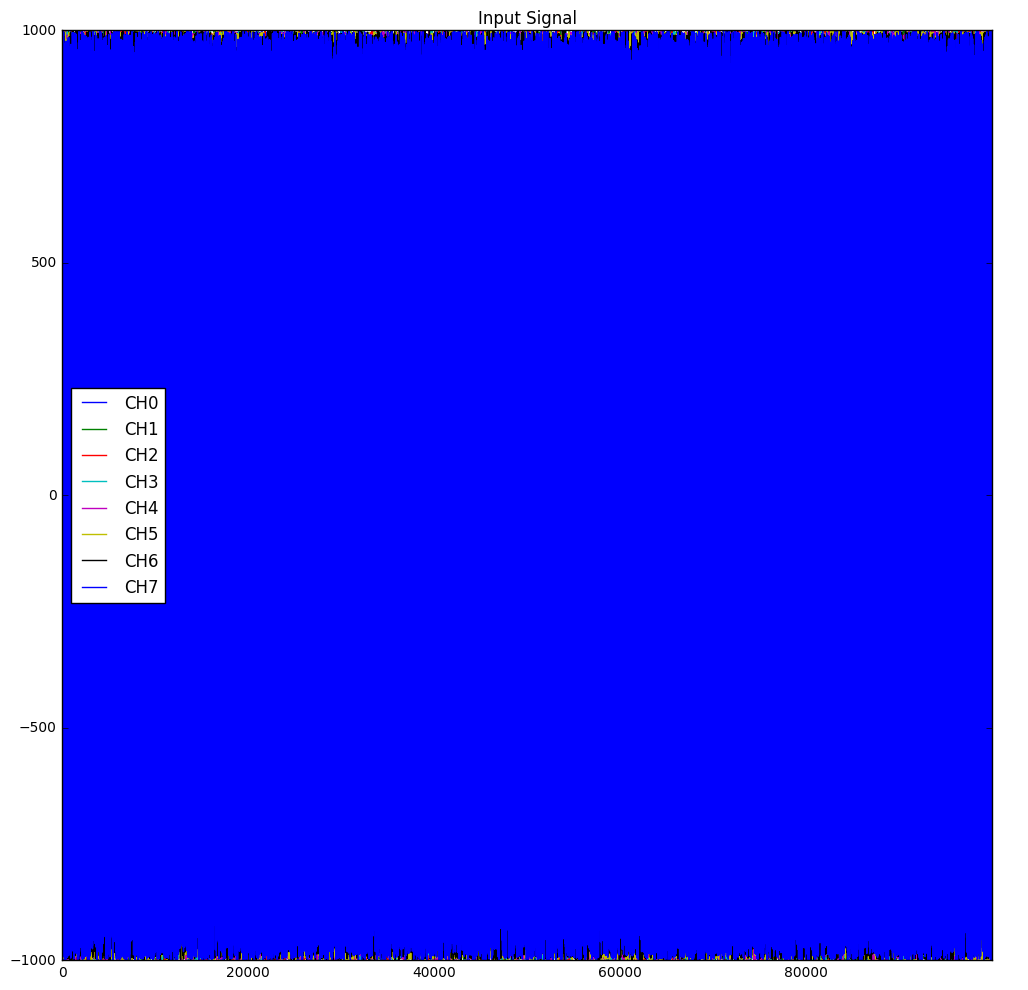

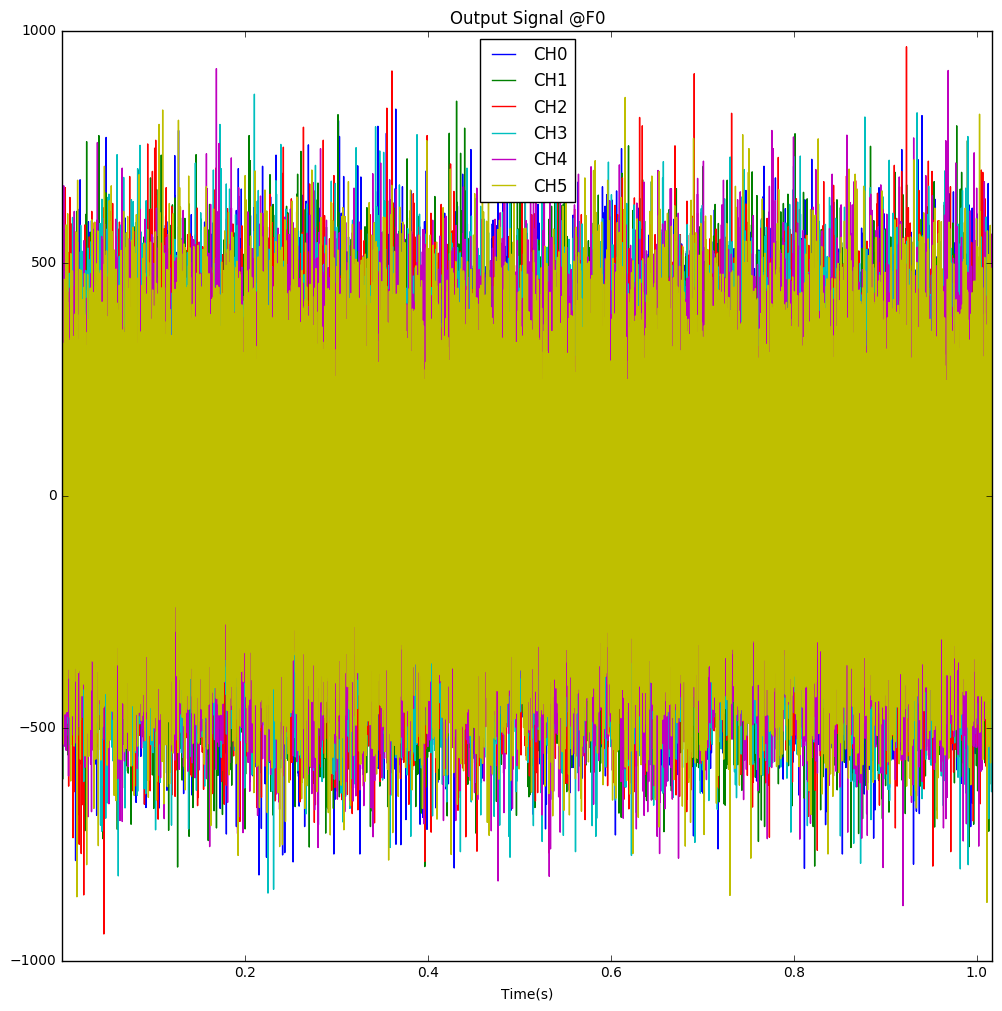

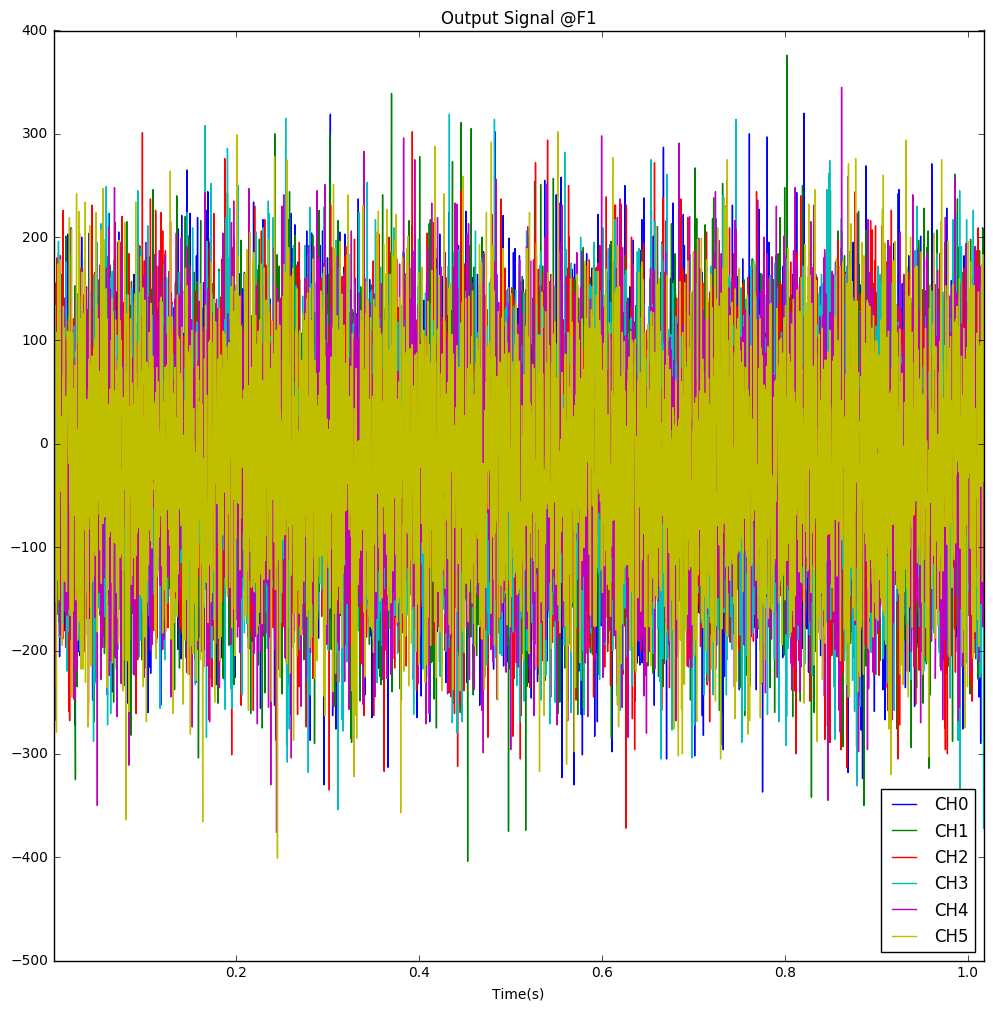

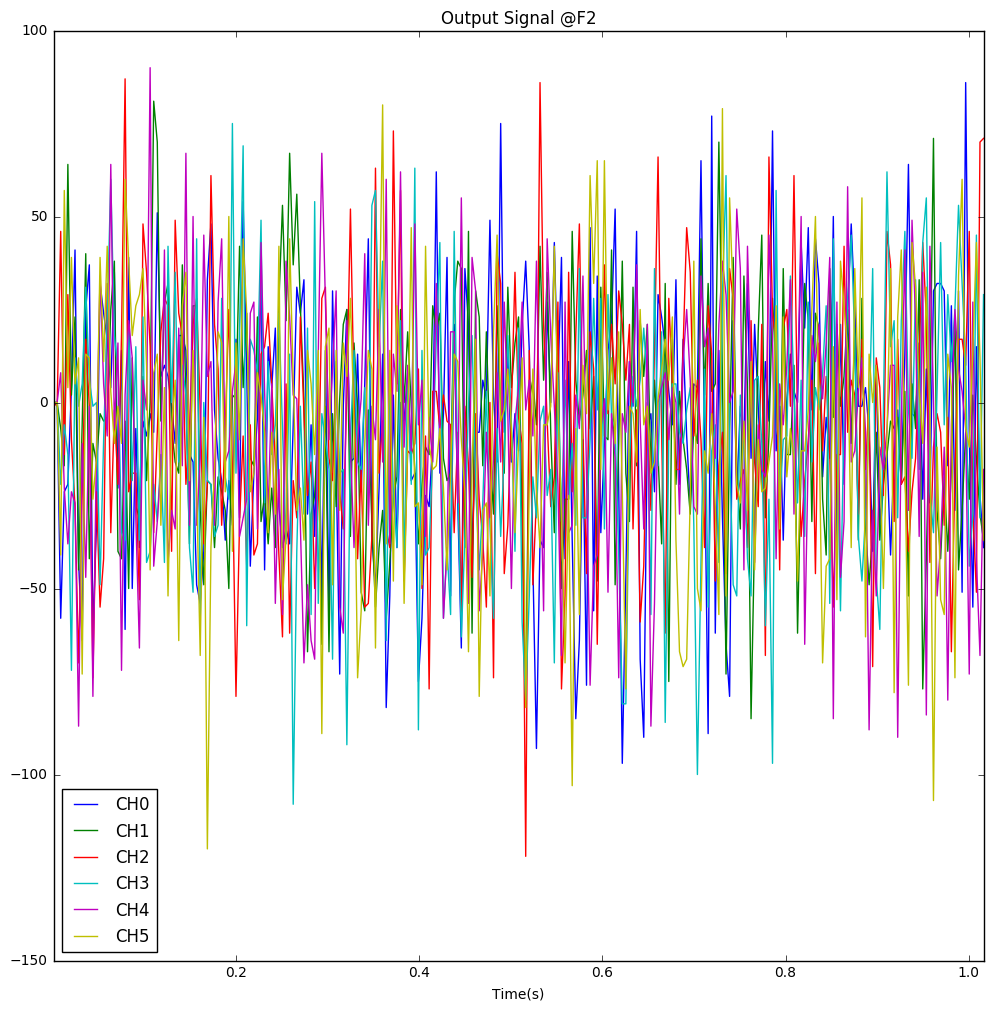

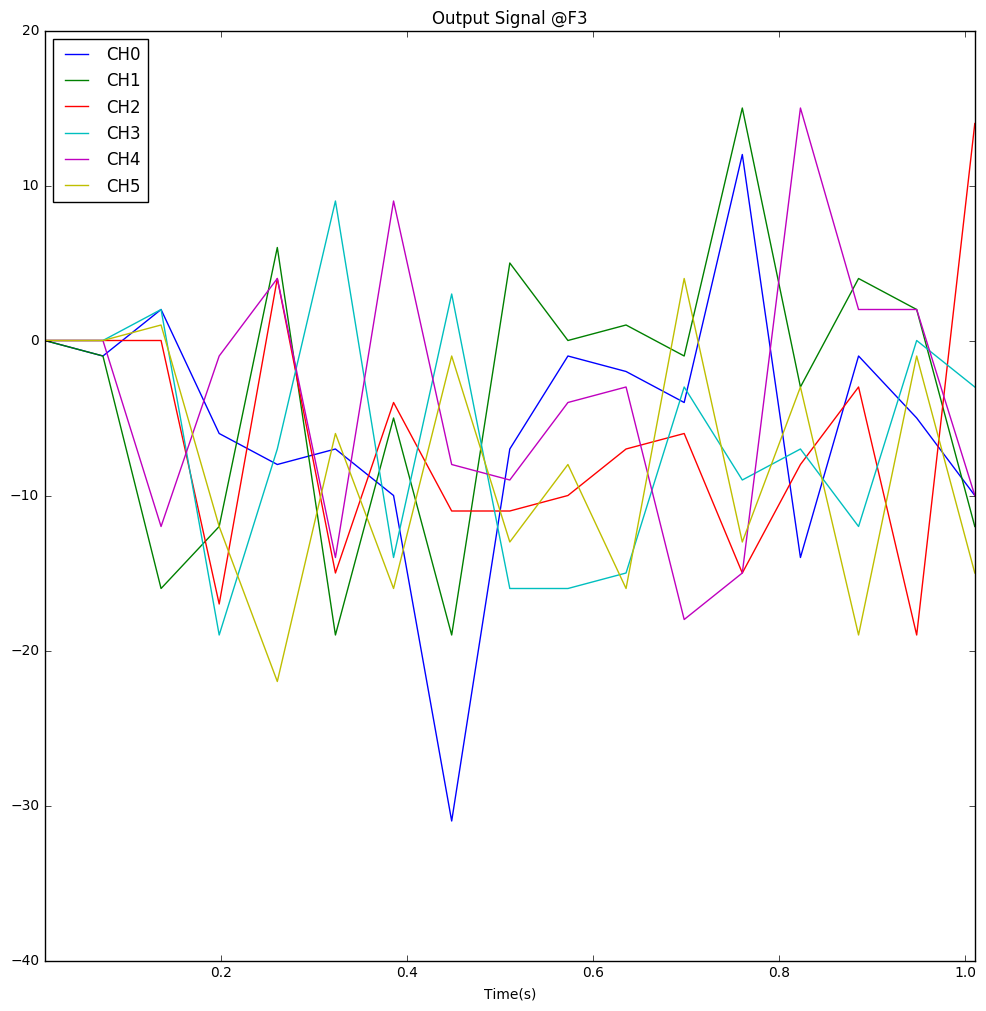

In [29]:
folder="./2016-11-16_14-47-36/"
inputsig = pds.read_csv(folder+"/input.txt",sep=" ",header=None)
inputsig.columns=[ "CH{}".format(i) for i in range(inputsig.shape[1])]
inputsig.plot(title="Input Signal",figsize=(12,12))
plt.show()
outputsig=[]
for i in range(4):
    outputsig.append(pds.read_csv(folder+"/output_f{}.txt".format(i),sep=" ",header=None,index_col=0))
    outputsig[i].columns=[ "CH{}".format(i) for i in range(outputsig[i].shape[1])]
    outputsig[i].index/=1e9
    outputsig[i].plot(title="Output Signal @F{}".format(i),figsize=(12,12))
    plt.xlabel("Time(s)")
    plt.show()
    


# PSD computation for each frequency channel of LFR 

The PSD is computed on exact VHDL simulation of LFR filters.

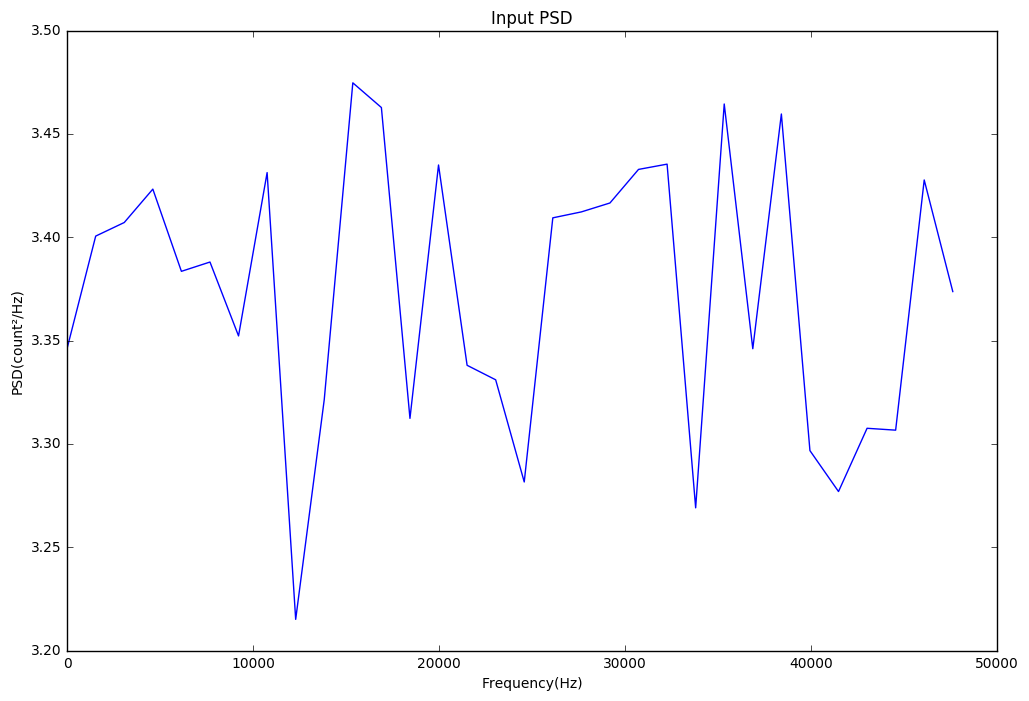

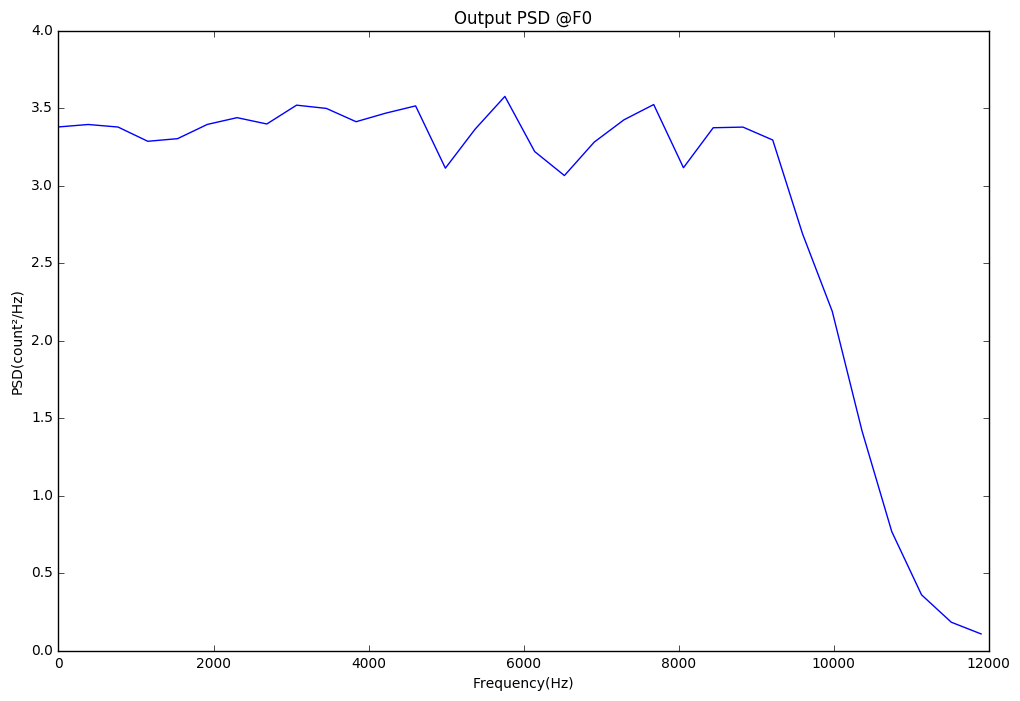

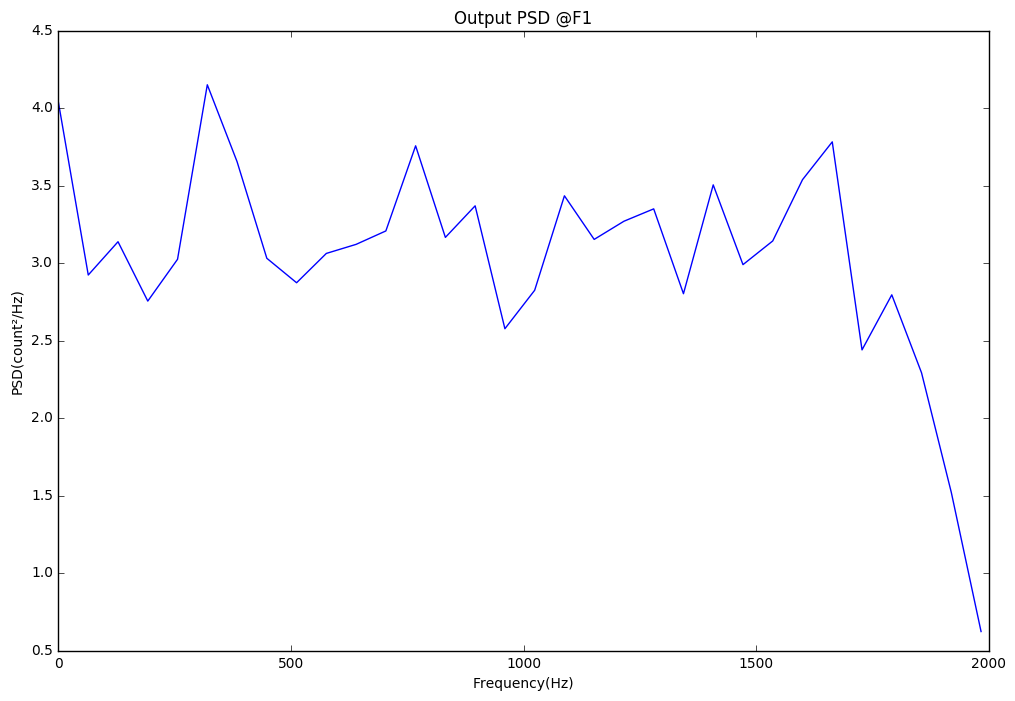

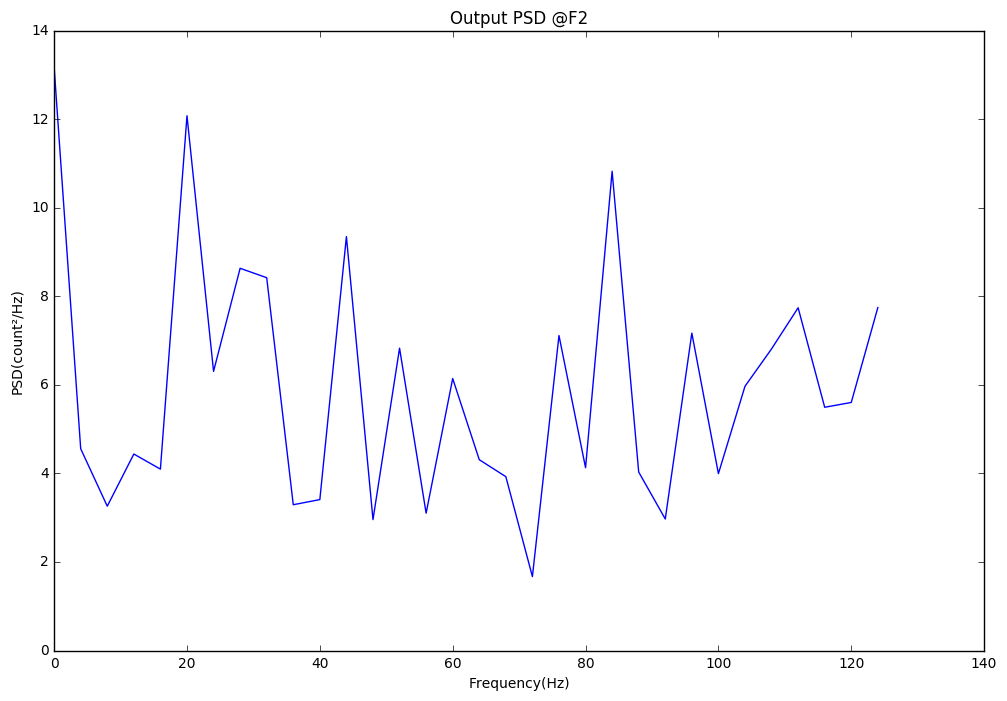

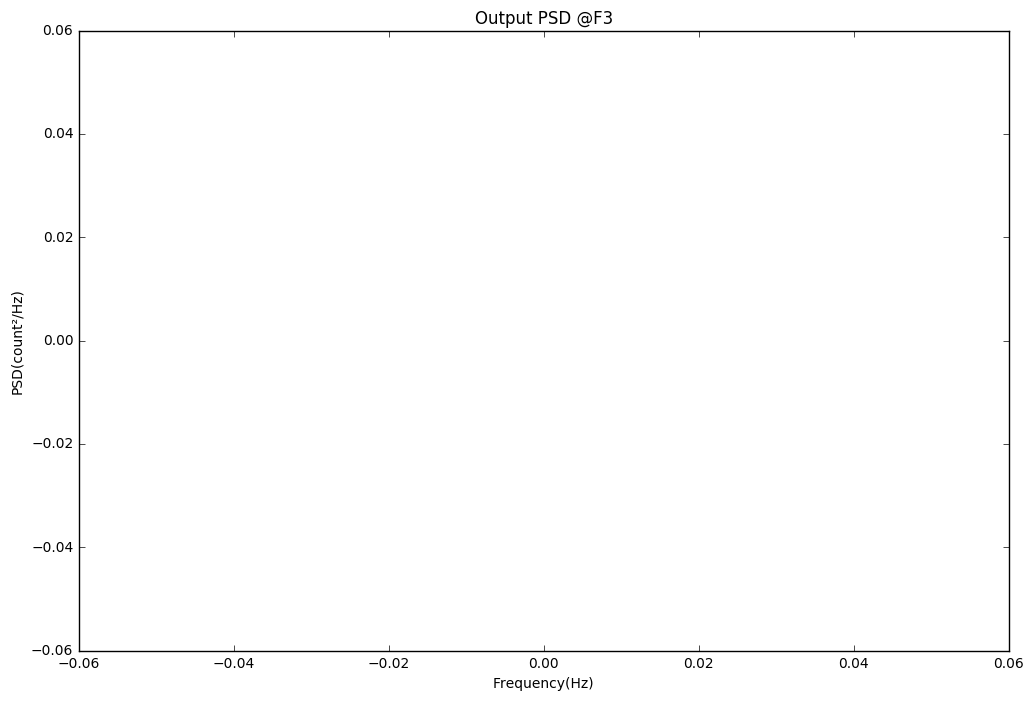

In [55]:
psd = compute_psd(inputsig["CH0"],INPUT_F,64,remove_mean=True)
plt.figure(figsize=(12,8))
plt.title("Input PSD")
plt.xlabel("Frequency(Hz)")
plt.ylabel("PSD(count²/Hz)")
plt.plot(psd["freq"],psd["PSD"])
plt.show()
for i in range(4):
    psd = compute_psd((outputsig[i]["CH0"]/0.89).values,OUTPUT_F[i],64,remove_mean=True)
    plt.figure(figsize=(12,8))
    plt.title("Output PSD @F{}".format(i))
    plt.xlabel("Frequency(Hz)")
    plt.ylabel("PSD(count²/Hz)")
    plt.plot(psd["freq"],psd["PSD"])
    plt.show()